# Netflix Movie Recommendation System

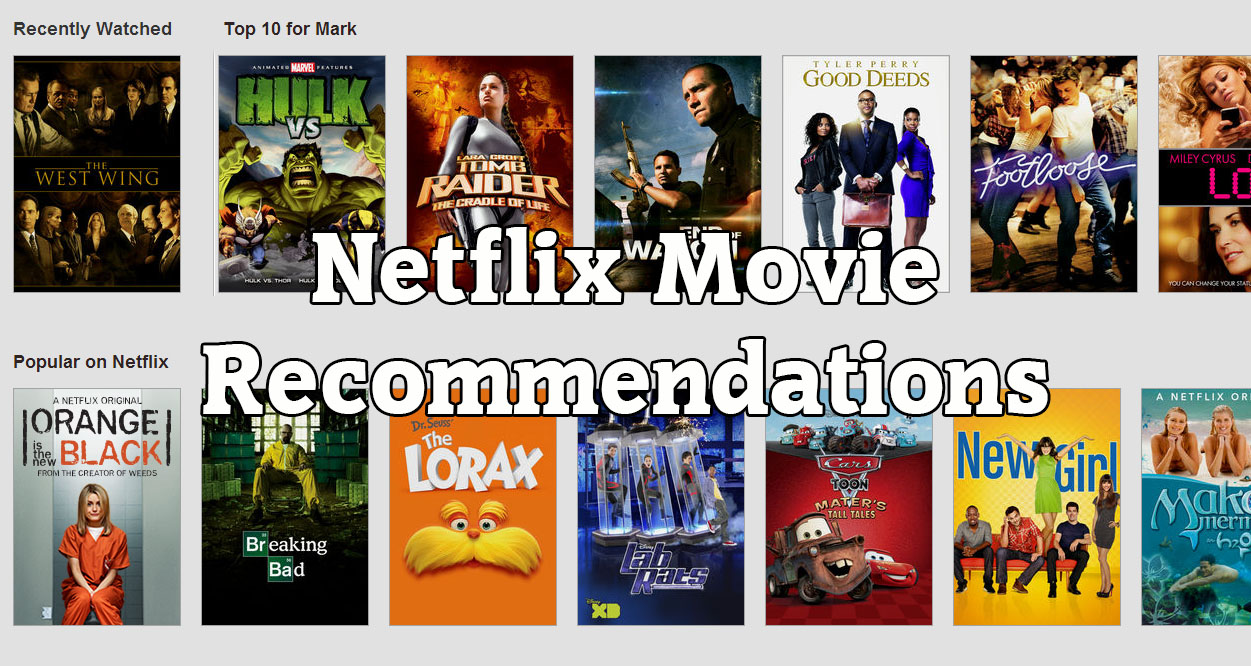

<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

<p>
Netflix is a online repository where we can watch videos, movies, documentaries etc.  Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM (Cinematch system is internally built by Netflix). Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better. 
</p>
Metric used is RMSE - Root Mean Squared Error
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>



<h2> 1.2 Problem Statement </h2>

<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>

<h2> 1.3 Sources </h2>

<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
</ul>

<h2>1.4 Real world/Business Objectives and constraints  </h2>

##### Objectives:

1. Predict the rating that a user would give to a movie that he/she has not yet rated.
2. Minimize the difference between predicted rating given by algorithm and actual rating given by user (RMSE and MAPE).<br>
3. RMSE - Root Mean Squared Error , MAPE - Mean Absolute Percentage Error. <br>
4. Rating values will be between 1 to 5. <br>
5. This case study is like regression problem and we can pose it as both, regression problem as it has rating(class Y) values from 1 to 5 and can also pose as a recommendation problem as we are trying to recommend movie Mj to a user Ui.
<br>

##### Constraints:

1. Some form of interpretability. We should understand why the model is recomending particular movie, and user also should understand why they are being recommended a movie. This is important constraint.


2. We may think that low-latency should be there for this recommendation , but netflix does not compute the movie recommendations right at the moment when the user logs-in. It will pre-compute all these movie recommendations for every user and put these recommendations in hash table or look-up table.
3. As soon as the user log-in, it will show the pre-computed movie recommendations to the user . As many users watch minimum number of movies a day, netflix can take hours and compute the movie recommendations for each day, and show to the users when they log-in. 
4. So these recommendations are good and so there is no explicit low latency requirement as recomendations can be pre-computed and there is no need to compute in milli-sec. 

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv   -- It has movie id and movie name</li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 unique users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<h3> 2.1.2 Example Data point </h3>

###### Format <br>
Movie id <li>
Customer/User id , movie rating(1 to 5) , movie watched date (yyyy-mm-dd). <li>
This format is there for every movie.

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>


1. For a given movie and user we need to predict the rating would be given by him/her to the movie. 
2. The given problem is a Recommendation problem . There are multiple approaches for this problem like similarity based approaches like user-user similarity , item-item similarity ,etc. , Matrix Factorization approaches  
3. It can also seen as a Regression problem. As ratings rij's are values between 1 to 5 . These are Yi's. And we can get Xi's from the recommendation system  matrix dataset of movies and users. 
4. So we will use concepts from recommendation and matrix factorixation like SVD, User-user similarity, movie-movie similarity and concepts of regression like XGBoost


<h3> 2.2.2 Performance metric </h3>

<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

Main objective is :-

1. Minimize RMSE - Root Mean Squared Error
2. Try to provide some interpretability (understanding of why model gave particular recommendations).

### Importing libraries

In [1]:
# 'datetime' is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.metrics import mean_squared_error

from surprise import Reader, Dataset
import scipy
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp


<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

<h3>3.1.1 Converting / Merging whole data in 4 files to required format: u_i, m_j, r_ij</h3>

1. Each row will have -   User id (Ui), Movie id (Mj), Rating (rij) User gave on Movie ,  Date of this rating.
2. We create a CSV file table with these 4 columns 

In [3]:
# this tells how much time did it take to complete execution of below steps. it is like start of timer 
start = datetime.now() 
if not os.path.isfile('total_data.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('total_data.csv', mode='w')
    
    row = list()
    # reading each of the 4 files and converting to the format we want 
    files=['combined_data_1.txt','combined_data_2.txt', 
           'combined_data_3.txt','combined_data_4.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)   # end of timer. current time - start time = time taken to run this.

Time taken : 0:00:00.000382


In [4]:
print("creating the dataframe from data.csv file..")
df = pd.read_csv('total_data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..') # sorting in increasing order of date
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [5]:
# date is in increasing order.
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [6]:
# 50% is the median rating which is 4.
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<h3>3.1.2 Checking for NaN values </h3>

In [7]:
# just to make sure that all Nan (Not a Number values) containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


<h3>3.1.3 Removing Duplicates </h3>

In [8]:
# now dataframe format is - [Mj, Ui, rij(rating given by user i to a movie j), date]
# checking for duplicates
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [9]:
# printing total data in csv file.  It is in format of  - Movie id(Mj), User id(Ui), Rating(rij), Date . 
# Data is sorted in In ascending order of date where olderst date at the first and newest date at the bottom
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


<h2>3.2 Spliting data into Train and Test(80:20) </h2>

1. There is temporal structure to the data. Data till today/all the historical data till current time is taken to train the model and the model is deployed into production to-night.
2. From tomorrow the model starts predicting the ratings will be given by any new user on any new movie.
3. Since there is temporal nature to the data, we can split the data temporally , according to date which is already sorted. First 80% data according to date is taken as train data and bottom 20% is test data. This creates the temporal nature of splitting the data.


In [10]:
if not os.path.isfile('train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    # First 80% data is train data and stored as csv file
    df.iloc[:int(df.shape[0]*0.80)].to_csv("train.csv", index=False) 

if not os.path.isfile('test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    # Bottom 20% of rows/data is test data and stored as test.csv file
    df.iloc[int(df.shape[0]*0.80):].to_csv("test.csv", index=False)

train_df = pd.read_csv("train.csv", parse_dates=['date'])
test_df = pd.read_csv("test.csv")

<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies) after splitting</h3>

In [11]:
# total 100 million rating are divided into 80 million train data and 20 million test data
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies) after splitting</h3>

In [12]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>

In [13]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<h3> 3.3.1 Distribution of ratings </h3>

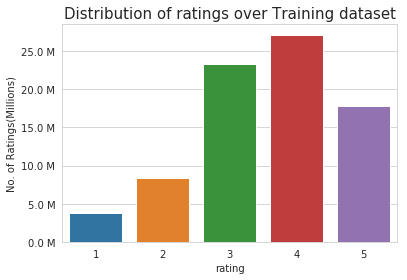

In [26]:
# typically ratings are higher not lower
%matplotlib inline
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

In [14]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.weekday_name

train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<h3> 3.3.2 Number of Ratings per a month </h3>

<IPython.core.display.Javascript object>


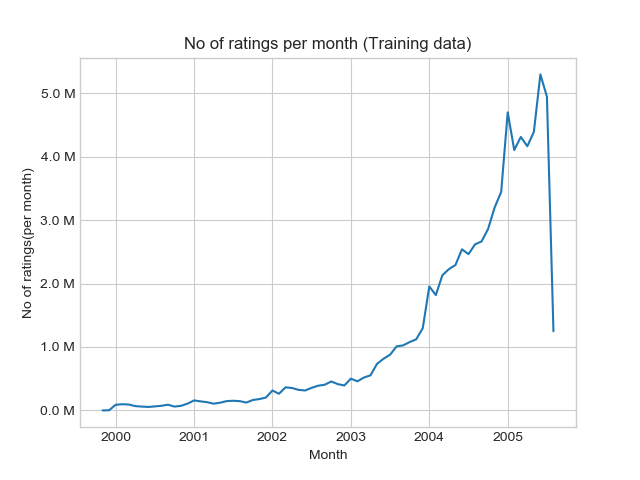

In [16]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

#### Observations: - 

1. Till Jan 2003 , there were less ratings and after 2003 till 2004 ratings increased massively and there is massive growth in netflix over the months. This observation is on train data.

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

In [15]:
# Number of ratings given by a particular user  / number of movies rated by a user.
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

### Plotting PDF and CDF  of number of movies ratings per user 

In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


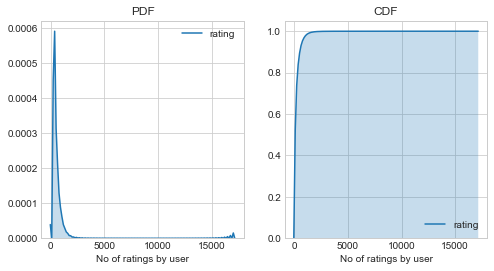

In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

#### Observation:- 
1. In PDF ,most people give very few ratings and very few users are giving lots of ratings. 
2. In CDF , we can see that 90% of people give very few ratings

### Getting percentiles / Quantiles of number of ratings per user

In [16]:
# Checking percentile of number of ratings per user 
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

#### Observation:-
1. Mean/ Average number of movies rated by a user is 198 . 
2. Minimum number of movies rated by a user is 1
3. Maximum number of movies rated by a user is 17112
4. Median number of movies rated by a user is 89, which is 50% of customers have rated more than 89 movies.

> _There,  is something interesting going on with the quantiles.._

In [17]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

### Plotting Quantiles and their Values  

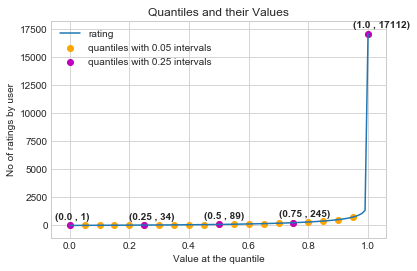

In [23]:
# Plotting Quantiles and their Values to get clear understanding of values/ratings between 75% and 100%
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [18]:
# Percentile values 
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

#### Observation:- 

1. From the above values, we can observe that there are 5% users who rated more than 749 movies which is a lot of ratings .
2. 50% of users rated more than 89 movies, and 50% of users rated less than or equal to 89 movies.
3. 90% of users rated 15 and more than 15 movies 

__how many ratings at the last 5% of all ratings__??

In [19]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 20305



<h3> 3.3.4 Analysis of ratings of a movie given by a user </h3>

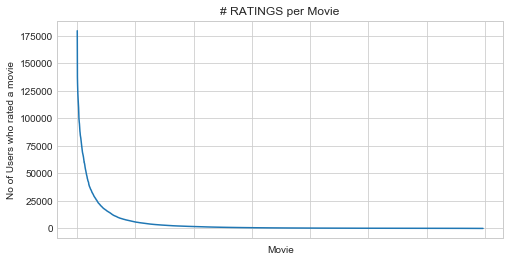

In [26]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

- __It is very skewed.. just like nunmber of ratings given per user.__
    
    
    - There are some movies (which are very popular) which are rated by huge number of users.
    
    - But most of the movies(like 90%) got some hundereds of ratings by fewer people.

<h3> 3.3.5 Number of ratings on each day of the week</h3>

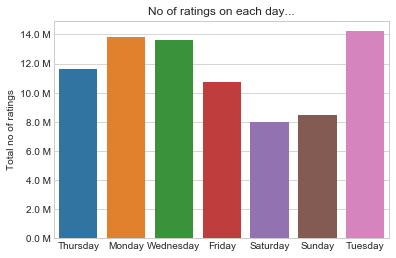

In [27]:
# Plot to see whether number of ratings differ by a day
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

#### Observation:-
1. There are fewer ratings on weekends Saturday and Sunday and there are more ratings on Tuesday followed by Monday.

### Plotting the boxplot to check if the day of week is an important feature to predict the ratings

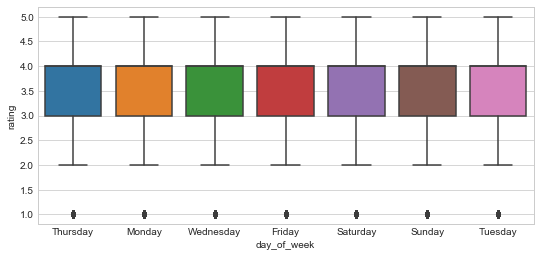

0:00:39.413397


In [28]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

#### Observation:-

1. As all the boxplots are aligned in similar manner, there is no much information in this plot.
2. This shows that day of week is not a very good predictor to predict the rating would a person give for a movie based on day of week. 

### Average rating for each day of week given by users

In [20]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




#### Observation:- 

1. By these average ratings we can observe that most of the ratings are very close for all days around 3.5 with very small deviation.
2. So day of week is not very important factor. So we can drop this feature from the data table. It is like a experiment to see whether the feature day of week important or not.

In ML and Data science most of the experiments around 90% of them fail and only 10% get succeed . 

<h3> 3.3.6 Creating sparse matrix from data frame </h3>

<table>
<tr>
<td>
![data_c.jpg](attachment:data_c.jpg)
</td>
<td>
![arrow.jpg](attachment:arrow.jpg)
</td>
<td>
![data_sparse_c.jpg](attachment:data_sparse_c.jpg)
</td>
</tr>
</table>

<h4> 3.3.6.1 Creating sparse matrix from train data frame </h4>

1. We are converting a dataframe into a matrix with users and movies. Each row corresponds to a user and each column corresponds to a movie.
2. Each user will not rate all the movies, they only rate some subset of movies. We are converting a dataframe into a sparse matrix .
3. To convert anything into a sparse matrix, in scipy there is a function called csr_matrix to create a sparse matrix .
4. csr_matrix is Compressed Sparse Row matrix. This matrix is very large and it is computationaly very high as there are many null entries.
5. The csr_matrix of scipy does not use entire data in the matrix, it optimizes the matrix and uses only non-zero/non-null entries of matrix.  
6. So we are creating sparse matrices of train and test data using csr_matrix of scipy.

#### Creating sparse matrix from train data frame 

In [21]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:04.332904


<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [22]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

# 99.89% of cells in train sparse matrix are non-existent or null values. There are no ratings given by any user
print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.8292709259195 % 


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [23]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:01.270394


<p><b>The Sparsity of Test data Matrix</b></p>

In [24]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


#### Observation:- 
1. There is extremely sparsity of data in both train and test matrices , over 99% of points have no ratings and are empty.

<h3>3.3.7 Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

1. Each row represents a user , each column is  a movie. 
2. First global mean we want to compute is the mean of all ratings. We take all the cells which have a non-null value. This tells us what is the mean/Average rating given by any netflix user on any given movie.
3. We have seen that the Median of number of ratings given by a user is 89, so in a row we can find good number of ratings.
4. Next we compute user averages , where each row of users in matrix is taken and average of all values is computed. This tells us whether the user typically gives high rating or low rating.
5. Next we compute movie averages. we take each column of movies and compute average of all values in that column, and we get movie average rating.
6. Both user averages and movie averages are vectors where for each user we get a average rating and for every movie we get movie average.
7. Global mean is a single value and is represented as 'Mu'.
8. User  average tells us about the user behaviour, whether they are critical or liniant. Movie average tells whether the movie is hit or not. These 2 averages are important.

In [25]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
# function get_average_ratings computes the averages and puts it into a dictionary

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [26]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> 3.3.7.2 finding average rating per user</h4>

In [27]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


<h4> 3.3.7.3 finding average rating per movie</h4>

In [28]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])


 AVerage rating of movie 15 : 3.3038461538461537


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

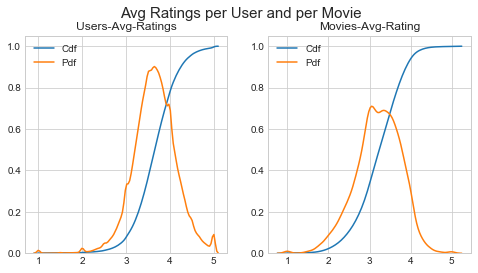

0:01:24.087875


In [29]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h3> 3.3.8 Cold Start problem </h3>

1. This is the important problem in recommender systems. We have sliced/divided data over time into train data-80% and test data-20%. 
2. There may be some users and some movies which are present in test data  and not training data.  There will be some new users and new movies created in test data time,  for whom there is no data in training data set . This is called cold start problem.

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [29]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 75148(15.65 %) 
 


#### Observation:-

1. Total number of users inluding train and test data is 480189 , of which 405041 users are present in trian and test data.
2. There are 75148 users (which is 15% of total users) who are present only in test data and not present in train data and there is no rating of them in past.
3. So from the above observations we say see that , 15% of users in test data do not have any rating that they provided in training data.
4. Here in case of users, cold start problem is severe.

> We might have to handle __new users__ ( ___75148___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [30]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 17770

Number of Users in Train data : 17424

No of Movies that didn't appear in train data: 346(1.95 %) 
 


#### Observation:-

1. There are total of 17770 movies in train and test data. Out of which only 346 movies are only present in test data and not in train data. This is 1.9% movies of total movies do not have correspoinding rating in training data.
2. Here cold start problem is not severe in case of movies.

> We might have to handle __346 movies__ (small comparatively) in test data

<h2> 3.4 Computing Similarity matrices </h2>

<h3> 3.4.1 Computing User-User Similarity matrix </h3>

1. Calculating User User Similarity_Matrix is __not very easy__(_unless you have huge Computing Power and lots of time_) because of number of. usersbeing lare.

    * You can try if you want to. Your system could crash or the program stops with **Memory Error**

2. Each column is a movie and each row corresponds to a user.
3. We can find user-user similarity by doing cosine similary between the users. User similarity matrix is a symmetric matrix. Each row and column corresponds to a user . There will be cosine similirites of users in the matrix.
4. This similairty matrix is not sparse as we can compute similarity for every pair of users . It is only symmetric in nature where Sim_ij = Sim_ji. So we need to compute 82 billion dot products , it is very expensive

<h3> 3.4.2 Computing Movie-Movie Similarity matrix </h3>

1. Each movie vectors are very large, each of this vector is extremely sparse.
2. Movie similaritymatrix gives similarity between the movies using cosine similarity. This matrix is symmetric and dense

In [31]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17771, 17771)  dimensional matrix
0:00:31.887204


In [32]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary, where key is movie and value is a dictionary , we use dictionary of dictionaries

In [33]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [34]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

0:00:31.211036


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706])

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [35]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 22.63 ms
Type conversion took: 11.07 ms
Parser memory cleanup took: 0.01 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


<p style='font-size:15px'><b>Similar Movies for 'Vampire Journals'</b></p>

In [36]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similarto this  and we will get only top most..


In [37]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

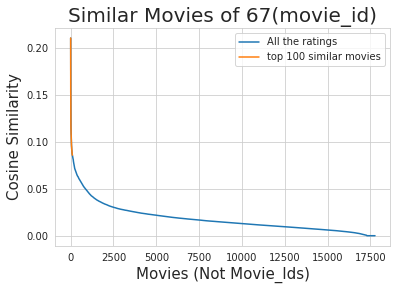

In [38]:
%matplotlib inline
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

#### Observation:-

1. The top similar movie to vampire journal has similarity value of 0.23 and 100th siimilarity of 0.08 approx
2. Orange line represents similarity values of the top 100 movies to vampire journals.

__Top 10 similar movies__

In [38]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


#### Observation:-

1. We got these similar movies names list just by computing movie-movie similarity using cosine similarity.

 > Similarly, we can ___find similar users___ and compare how similar they are. 

 <h1> 4.  Machine Learning Models </h1>
 
 1. Here we use both regression and recommendation systems ideas.
 2. Our task is, given User Ui, and Movie Mj, we have to predict rating rij. Xi = {Ui,Mj} this is input and Yi = rij is output. We pose this as regression problem.
 3. Based on input we can get features like, user-user similarity and movie-movie similarity, average rating given by user to a movie etc. 
 
 #### Surprise library:- 
 1. It is one of the best library for recommender systems in python. It is very compatibale with python and it works very well for this case study.
 2. It has algorithms like baseline algorithms, neighbourhood method and matrix factorization methods like SVD, SVD++, NMF(Non Negative Matrix Factorization). It has built-in cosine similarities
 3. SurPRISE - Simple Python Recommendation System Engine
 

#### Model 1:-

1. On the feature set 1 which have 13 hand-crafted characters , we build/train the XGBoost Regessor with RMSE as loss function. We have to minimise the RMSE. This is first model and we don't use Surprise library here.

#### Model 2 :-

1. We use Surprise library here and there are many models in surprise library like Baseline model, KNN Model, Knn model with item-item similarity. 
2. Given user and movie, the baseline model predicts a rating rij, and we use this rating output from this model as a feature . Now we have first 13 features + this 1 feature from baseline model from surprise library. So total 14 features. 
3. Using these 14 features, then we train the model with XGBoost with 14 features. This is model 2.

#### Model 3:-

1. Now we compute Knn model with user user similarity and this output will become the 15th / 3rd set of feature. Then we compute surprise with item item similarity and get the output as feature 16 or feature set 4. 

SO set 1 features - 13 hand-crafted characters
set 2 - Output of baseline model
set 3 - output of KNN model with user-user similarity
set 4 - output of KNN model with item-item/movie-movie similarity

Now final model we get is XGBoost with feature sets 1,2,3,4

2. We get Feature set 5 by using surprise library with Matrix Factorization SVD . Output of SVD is the feature set 5.
3. We get feature set 6 by using SVD++ . It is output of SVD++. 
4. So we use the outputs of all models of Surprise .Total there are 6 feature sets.
5. Now by taking all these 6 feature sets as input Xi and we build 2 more XGBoost models and get Yi which is the rating given by a user to a movie. 


<img src='images/models.jpg' width=500px>

In [39]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

<h2> 4.1 Sampling Data </h2>

<h3>4.1.1 Build sample train data from the train data</h3>

Taking sample of 25k  Users and 3k movies for Train data

In [40]:
start = datetime.now()
path = "sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 25k users and 3k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=25000, no_movies=3000,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.075931


<h3>4.1.2 Build sample test data from the test data</h3>

Taking sample of 10k Users and 1k movies for Test data

In [41]:
start = datetime.now()

path = "sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 10k users and 1000 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=10000, no_movies=1000,
                                                 path = path)
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.042622


<h2>4.2 Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)</h2>

In [42]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all movie ratings</h3>

In [43]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.581679377504138}

<h3>4.2.2 Finding Average rating per User</h3>

In [46]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])


Average rating of user 1515220 : 3.9655172413793105


<h3>4.2.3 Finding Average rating per Movie</h3>

In [47]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])


 AVerage rating of movie 15153 : 2.6458333333333335


<h2> 4.3 Featurizing data </h2>

In [48]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 129286


 No of ratings in Our Sampled test  matrix is : 7333



<h3> 4.3.1 Featurizing data for regression problem </h3>

<h4> 4.3.1.1 Featurizing train data </h4>

In [49]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [50]:
############################################################
# It took me almost 10 hours to prepare this train dataset.#
# 'sample/small/reg_train.csv' 
############################################################
start = datetime.now()
if os.path.isfile('reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

File already exists you don't have to prepare again...
0:00:00.000709


__Reading from the file to make a Train_dataframe__

In [51]:
reg_train = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5
4,112974,33,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,5


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    sur1 - similar user 1
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this user.. )
     smr1 - similar movie rated 1 

- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

Given user Ui, movie Mj, rating rij, we have to convert it into a regression problem.  Steps for this are:-

1. Using Ui and Mj data, we compute a vector of features Xij and rating rij becomes Yij. Now the dataset is {Xij, Yij}

There are 13 features 
1. Global Average
2,3,4,5,6 - top 5 similar users rated the movie
7,8,9,10,11 - top 5 similar movies rated by the user
12. User Average
13. Movie Average 

All these 13 features becomes Xij feature vector

When we compute similar users on test data, we have to compare with training data similar users . We cannot use test data for feature engineering

If a user is in test data  and is not present in train data , which is a cold start problem, then we give all the 'sur' ratings to 0 ,as the user is new and there are no similar users. Same for movies data also.

<h4> 4.3.1.2 Featurizing test data </h4>

In [52]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [53]:
sample_train_averages['global']

3.581679377504138

In [54]:
start = datetime.now()

if os.path.isfile('reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

It is already created...


__Reading from the file to make a Test_dataframe__

In [55]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h3> 4.3.2 Transforming data for Surprise models</h3>

Surprise uses a data format internally tto make execution of these algorithms fast to train

<h4> 4.3.2.1 Transforming train data </h4>

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

Surprise reader quickly reads the data from pandas dataframe or a file and trasform it internally into a format it wants

In [56]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# Giving the train dataframe to the surprise and converting into train_data which is a surprise variable 
# in which all training data stored
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from train_data.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

<h4> 4.3.2.2 Transforming test data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [57]:
# test dataframes is converted into a testset that surprise needs
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

<h2> 4.4 Applying Machine Learning models </h2>

Applying XGBoost on 13 features. 

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [58]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [59]:
# there are 2 error metrics - RMSE , MAPE
# to get rmse and mape given actual and predicted ratings rij's..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions.... evaluate the model
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

> __Utility functions for Surprise modes__

In [60]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

<h3> 4.4.1 XGBoost with initial 13 features </h3>

In [61]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

Model with best parameters is :
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=13,
       nthread=None, objective='reg:linear', random_state=15, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
The optimal value of n_estimators is : 100
The optimal value of max_depth is: 5
Evaluating the model with TRAIN data...

TRAIN DATA
------------------------------
RMSE :  0.8346452174223339
MAPE :  24.751039447859068
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0755881866540673
MAPE :  34.55557960993355


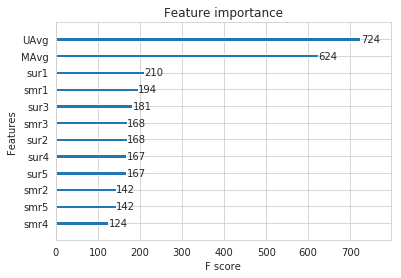

Time Taken:0:06:05.766319


In [62]:
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

params = {'n_estimators': [16, 32, 64, 80, 100], 'max_depth': [3, 5, 7, 9]}

first_xgb = xgb.XGBRegressor(silent=True, n_jobs=13, random_state=15)
xgb_model = GridSearchCV(first_xgb, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=3)
xgb_model.fit(x_train, y_train)
  
print("Model with best parameters is :\n", xgb_model.best_estimator_)

optimal_n_estimators =  xgb_model.best_estimator_.n_estimators
print("The optimal value of n_estimators is :", optimal_n_estimators)

optimal_max_depth = xgb_model.best_estimator_.max_depth
print("The optimal value of max_depth is:", optimal_max_depth)

xgb_optimal = xgb.XGBRegressor(n_estimators = optimal_n_estimators, max_depth = optimal_max_depth)

# fitting the optimal model on train data
xgb_optimal.fit(x_train, y_train)

# from the trained model, get the predictions.... evaluate the model on train data
print('Evaluating the model with TRAIN data...')
train_pred = xgb_optimal.predict(x_train)
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, train_pred)
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train, 'mape' : mape_train, 'predictions' : train_pred}
print('\nTRAIN DATA')
print('-'*30)
print('RMSE : ', rmse_train)
print('MAPE : ', mape_train)
    
#######################################
# get the test data predictions and compute rmse and mape
print('Evaluating Test data')
# predict the response
test_pred = xgb_optimal.predict(x_test)
# get the rmse and mape of test data..
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred = test_pred)
# store them in test results dictionary.
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions': test_pred}
print('\nTEST DATA')
print('-'*30)
print('RMSE : ', rmse_test)
print('MAPE : ', mape_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(xgb_optimal)
plt.show()

print("Time Taken:{}".format(datetime.now()-start))

#### Observation:-
1. Test RMSE for this model is 1.0755 , as we training the model on sample data of 25k users and 3k movies. But if we train on entire data then the results will be much better and RMSE value will be reduced further.

2. From the above plot,we can see, the most important feature in predicting the rating(rij) that user Ui would give on Movie Mj, is the User Average (UAvg).
3. The relative difference between the values/scores of features matter here.
4. 2nd important feature is Movie Mj avg.
5. Next we get similar user rating(sur) and similar movie rating(smr) 


<h3> 4.4.2 Suprise BaselineModel </h3>
    


__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all ratings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 

r_ui^ : rating that the user u  gave on item i (item is movie in this case). This is predicted value.
1. In actual data ,we have user, movie and rating r_ui . Now the model predicts rating r_ui^ 
2. so predicted value r_ui^ is called b_ui , b is baseline . It is a baseline model. 
3. So the above equation says, it predicts the predicted rating r_ui^ as sum of global mean (mu) and bias for each user and item(movie). mu is constant (like 3.5), it is the average of all ratings in training data.
4. We have to compute user and item bias . 
5. Here user bias is like user mean and item/movie bias is like movie mean in 13 features where we explicitly cmputed it. But in this case there is no explicitly computing these ,we only compute global average explicitly. 
6. These biases will be estimated by solving optimization problem, like Least squares problem .


#### Optimization function ( Least Squares Problem ) 

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 
    
  r_ui^ = mu + b_u + b_i

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

1. In this problem we have to minimmize the difference between actual rating (r_ui) and predicted rating(r_ui^), given biases . Mu is fixed as global average . and add L2 regularizer.
2. So this problem is, minimize b_u and b_i over all possible values of r_ui (r_ui - r_ui^) + Lamda. regularization . This is standard Least squares optimization problem.
3. We can solve this problem with SGD 

In [63]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
# we use BaselineOnly model with SGD as optimizer 
bsl_algo = BaselineOnly(bsl_options=bsl_options)  
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.811972 

Evaluating the model with train data..
time taken : 0:00:01.262837
---------------
Train Data
---------------
RMSE : 0.9347153928678286

MAPE : 29.389572652358183

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.078190
---------------
Test Data
---------------
RMSE : 1.0730330260516174

MAPE : 35.04995544572911

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:02.154054


#### Observation:-

1. We got the training data RMSE of 0.93 and test data RMSE of 1.0730. We only consider test data RMSE.
2. If there is much difference between both train and test error/RMSE, then the model is overfitting. But in above Baseline model there is no much difference between them, so model is not overfitting . 

3. In XGBoost model with 13 features , we got test error of 1.075, this baseline model has 1.073 , which is slightly better


<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

1. To the 13 features , we add a 14th feature which is a predicted value of a baseline model (bslpr) 
2. Given Ui and Mj and baseline model, then it returns a rating as output which is baseline model predicted value and make it as a 14th feature and apply XGBoost on all these 14 features.
3. So the output we get from surprise models, we make them as features to XGBoost model . 

__Updating Train Data__

In [64]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403


__Updating Test Data__

In [65]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679


### Training the Model

In [66]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

Model with best parameters is :
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=13,
       nthread=None, objective='reg:linear', random_state=15, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
The optimal value of n_estimators is : 100
The optimal value of max_depth is: 5
Evaluating the model with TRAIN data...

TRAIN DATA
------------------------------
RMSE :  0.8347924892733507
MAPE :  24.766660508668497
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0755535872144923
MAPE :  34.56640790617408


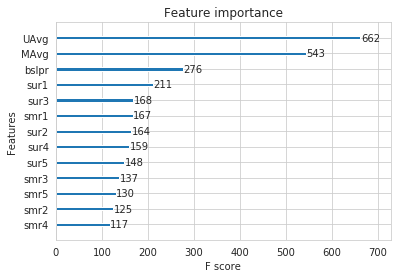

Time Taken:0:24:18.995085


In [67]:
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

params = {'n_estimators': [16, 32, 64, 80, 100], 'max_depth': [3, 5, 7, 9]}

sur_xgb = xgb.XGBRegressor(silent=True, n_jobs=13, random_state=15)
xgb_sbl = GridSearchCV(sur_xgb, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=3)
xgb_sbl.fit(x_train, y_train)
  
print("Model with best parameters is :\n", xgb_sbl.best_estimator_)

optimal_n_estimators =  xgb_sbl.best_estimator_.n_estimators
print("The optimal value of n_estimators is :", optimal_n_estimators)

optimal_max_depth = xgb_sbl.best_estimator_.max_depth
print("The optimal value of max_depth is:", optimal_max_depth)

xgb_sbl_optimal = xgb.XGBRegressor(n_estimators = optimal_n_estimators, max_depth = optimal_max_depth)

# fitting the optimal model on train data
xgb_sbl_optimal.fit(x_train, y_train)

# from the trained model, get the predictions.... evaluate the model on train data
print('Evaluating the model with TRAIN data...')
train_pred = xgb_sbl_optimal.predict(x_train)
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, train_pred)
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train, 'mape' : mape_train, 'predictions' : train_pred}
print('\nTRAIN DATA')
print('-'*30)
print('RMSE : ', rmse_train)
print('MAPE : ', mape_train)
    
#######################################
# get the test data predictions and compute rmse and mape
print('Evaluating Test data')
# predict the response
test_pred = xgb_sbl_optimal.predict(x_test)
# get the rmse and mape of test data..
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred = test_pred)
# store them in test results dictionary.
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions': test_pred}
print('\nTEST DATA')
print('-'*30)
print('RMSE : ', rmse_test)
print('MAPE : ', mape_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_sbl_optimal)
plt.show()

print("Time Taken:{}".format(datetime.now()-start))

#### Observation:-

1. F Score means Feature Score.

<h3> 4.4.4 Surprise KNNBaseline predictor </h3>


- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  

    - Generally, similarity value can be computed with 2 methods - cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
    - shrunk comes from the word shrinkage , which is like laplace smoothing   

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [68]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

# k = 40 means 40 nearest neighbors
knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
# knn_bsl_u = knn baseline user-user similarity
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:35.315680 

Evaluating the model with train data..
time taken : 0:01:44.465502
---------------
Train Data
---------------
RMSE : 0.33642097416508826

MAPE : 9.145093375416348

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.082533
---------------
Test Data
---------------
RMSE : 1.0726493739667242

MAPE : 35.02094499698424

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:19.864556


#### Observations:- 

1. As the train model and test model RMSE has much difference, we can do hyperparameter tuning with hyperparameters like shrinkage, min_support  and k, using grid serach / random , we can improve test error. 


<h4> 4.4.4.2 Surprise KNNBaseline with movie movie similarities</h4>

In [69]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users
# taking 2 nearest neighbors --  min_support: 2
sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2   
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}

# nearest neighbors = 40
knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:01.047015 

Evaluating the model with train data..
time taken : 0:00:10.449413
---------------
Train Data
---------------
RMSE : 0.32584796251610554

MAPE : 8.447062581998374

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.080761
---------------
Test Data
---------------
RMSE : 1.072758832653683

MAPE : 35.02269653015042

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:11.578099


<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>


- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

#### Preparing Train data

In [70]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302


#### Preparing Test data  

In [71]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679


### Training the model

In [72]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

Model with best parameters is :
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=13,
       nthread=None, objective='reg:linear', random_state=15, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
The optimal value of n_estimators is : 100
The optimal value of max_depth is: 5
Evaluating the model with TRAIN data...

TRAIN DATA
------------------------------
RMSE :  0.8347193192795542
MAPE :  24.77271608838077
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0754488117769814
MAPE :  34.57388916971077


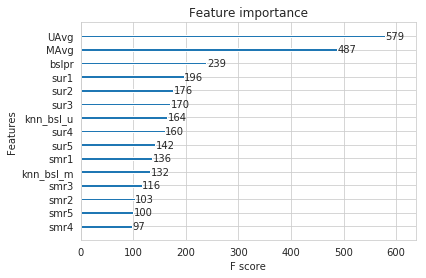

Time Taken:0:45:11.862591


In [73]:
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

params = {'n_estimators': [16, 32, 64, 80, 100], 'max_depth': [3, 5, 7, 9]}

knn_xgb = xgb.XGBRegressor(silent=True, n_jobs=13, random_state=15)
xgb_sbl_knn = GridSearchCV(knn_xgb, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=3)
xgb_sbl_knn.fit(x_train, y_train)
  
print("Model with best parameters is :\n", xgb_sbl_knn.best_estimator_)

optimal_n_estimators =  xgb_sbl_knn.best_estimator_.n_estimators
print("The optimal value of n_estimators is :", optimal_n_estimators)

optimal_max_depth = xgb_sbl_knn.best_estimator_.max_depth
print("The optimal value of max_depth is:", optimal_max_depth)

xgb_sbl_knn_optimal = xgb.XGBRegressor(n_estimators = optimal_n_estimators, max_depth = optimal_max_depth)

# fitting the optimal model on train data
xgb_sbl_knn_optimal.fit(x_train, y_train)

# from the trained model, get the predictions.... evaluate the model on train data
print('Evaluating the model with TRAIN data...')
train_pred = xgb_sbl_knn_optimal.predict(x_train)
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, train_pred)
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train, 'mape' : mape_train, 'predictions' : train_pred}
print('\nTRAIN DATA')
print('-'*30)
print('RMSE : ', rmse_train)
print('MAPE : ', mape_train)
    
#######################################
# get the test data predictions and compute rmse and mape
print('Evaluating Test data')
# predict the response
test_pred = xgb_sbl_knn_optimal.predict(x_test)
# get the rmse and mape of test data..
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred = test_pred)
# store them in test results dictionary.
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions': test_pred}
print('\nTEST DATA')
print('-'*30)
print('RMSE : ', rmse_test)
print('MAPE : ', mape_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results

xgb.plot_importance(xgb_sbl_knn_optimal)
plt.show()

print("Time Taken:{}".format(datetime.now()-start))

#### Observation:-

Till now we have done 13 handcrafted features , surprise baseline predictors, KNN baseline model with users , KNN baseline model with movies. Now we have to do matrix factorizations like SVD, SVD++. Surprise library has matrix factorization techniques.

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        
        
- q_i^T p_u  - is the Matrix Factorization part. To compute Matrix Factorization , there are multiple ways. 1. SVD , 2. NMF

1. Here q_i and p_u is vector where there is no need of all the elements of it to be positive /there is no non-negative constraint. So it is not NMF. We can solve it using SVD.

- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [74]:
# initiallize the model
# n_factors=100 is the 'K' which is a hyperparameter
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:07.896170 

Evaluating the model with train data..
time taken : 0:00:01.384968
---------------
Train Data
---------------
RMSE : 0.6574721240954099

MAPE : 19.704901088660474

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.078622
---------------
Test Data
---------------
RMSE : 1.0726046873826458

MAPE : 35.01953535988152

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:09.360622


#### Observation:-
1. We got less test RMSE of 1.072 which is less when compared to all the models till now. So this is basic SVD model with Baseline. 

  <h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>
  
  This is also called as SVDpp or SVD++

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 

 - $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 

In [75]:
# initiallize the model , n_factors is 'K' which is dimensions
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results


Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:02:05.415920 

Evaluating the model with train data..
time taken : 0:00:06.835009
---------------
Train Data
---------------
RMSE : 0.6032438403305899

MAPE : 17.49285063490268

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.079524
---------------
Test Data
---------------
RMSE : 1.0728491944183447

MAPE : 35.03817913919887

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:12.331551


<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

In Matrix Factorization , we have seen 2 techniques - SVD and SVD++ 

__Preparing Train data__

In [76]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,...,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958,4.303764,3.621664
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,...,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302,3.278967,3.538247


__Preparing Test data__

In [77]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679,3.581679,3.581679


#### Training the model -  XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques 

In [78]:
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']


Model with best parameters is :
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=13,
       nthread=None, objective='reg:linear', random_state=15, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
The optimal value of n_estimators is : 100
The optimal value of max_depth is: 5
Evaluating the model with TRAIN data...

TRAIN DATA
------------------------------
RMSE :  0.8338467813405877
MAPE :  24.745181265602316
------------------------------------------------------------
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.077182757447147
MAPE :  34.41750848790213


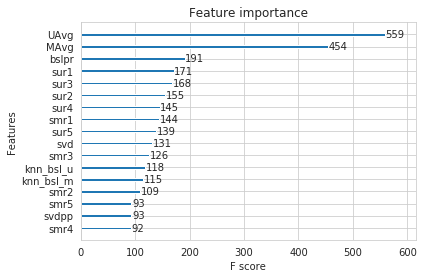

Time Taken:1:34:00.060354


In [79]:
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

params = {'n_estimators': [16, 32, 64, 80, 100], 'max_depth': [3, 5, 7, 9]}

final_xgb = xgb.XGBRegressor(silent=True, n_jobs=13, random_state=15)
xgb_svdpp = GridSearchCV(final_xgb, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=3)
xgb_svdpp.fit(x_train, y_train)
  
print("Model with best parameters is :\n", xgb_svdpp.best_estimator_)

optimal_n_estimators =  xgb_svdpp.best_estimator_.n_estimators
print("The optimal value of n_estimators is :", optimal_n_estimators)

optimal_max_depth = xgb_svdpp.best_estimator_.max_depth
print("The optimal value of max_depth is:", optimal_max_depth)

xgb_svdpp_optimal = xgb.XGBRegressor(n_estimators = optimal_n_estimators, max_depth = optimal_max_depth)

# fitting the optimal model on train data
xgb_svdpp_optimal.fit(x_train, y_train)

# from the trained model, get the predictions.... evaluate the model on train data
print('Evaluating the model with TRAIN data...')
train_pred = xgb_svdpp_optimal.predict(x_train)
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, train_pred)
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train, 'mape' : mape_train, 'predictions' : train_pred}
print('\nTRAIN DATA')
print('-'*30)
print('RMSE : ', rmse_train)
print('MAPE : ', mape_train)
    
#######################################
# get the test data predictions and compute rmse and mape
print('--'*30)
print('Evaluating Test data')
# predict the response
test_pred = xgb_svdpp_optimal.predict(x_test)
# get the rmse and mape of test data..
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred = test_pred)
# store them in test results dictionary.
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions': test_pred}
print('\nTEST DATA')
print('-'*30)
print('RMSE : ', rmse_test)
print('MAPE : ', mape_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results

xgb.plot_importance(xgb_svdpp_optimal)
plt.show()

print("Time Taken:{}".format(datetime.now()-start))

<h3> 4.4.8 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

We removed 13 features here

In [80]:
# prepare train data , svdpp - svd++
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']

Model with best parameters is :
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=64, n_jobs=13,
       nthread=None, objective='reg:linear', random_state=15, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
The optimal value of n_estimators is : 64
The optimal value of max_depth is: 3
Evaluating the model with TRAIN data...

TRAIN DATA
------------------------------
RMSE :  1.0743221721956466
MAPE :  35.26360668366878
------------------------------------------------------------
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0753442199902932
MAPE :  35.05268362328282


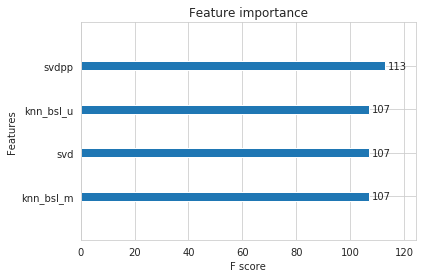

Time Taken:1:45:13.663355


In [81]:
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

params = {'n_estimators': [16, 32, 64, 80, 100], 'max_depth': [3, 5, 7, 9]}

xgb_model = xgb.XGBRegressor(silent=True, n_jobs=13, random_state=15)
xgb_nofeatures = GridSearchCV(xgb_model, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=3)
xgb_nofeatures.fit(x_train, y_train)
  
print("Model with best parameters is :\n", xgb_nofeatures.best_estimator_)

optimal_n_estimators =  xgb_nofeatures.best_estimator_.n_estimators
print("The optimal value of n_estimators is :", optimal_n_estimators)

optimal_max_depth = xgb_nofeatures.best_estimator_.max_depth
print("The optimal value of max_depth is:", optimal_max_depth)

xgb_nofeatures_optimal = xgb.XGBRegressor(n_estimators = optimal_n_estimators, max_depth = optimal_max_depth)

# fitting the optimal model on train data
xgb_nofeatures_optimal.fit(x_train, y_train)

# from the trained model, get the predictions.... evaluate the model on train data
print('Evaluating the model with TRAIN data...')
train_pred = xgb_nofeatures_optimal.predict(x_train)
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, train_pred)
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train, 'mape' : mape_train, 'predictions' : train_pred}
print('\nTRAIN DATA')
print('-'*30)
print('RMSE : ', rmse_train)
print('MAPE : ', mape_train)
    
#######################################
# get the test data predictions and compute rmse and mape
print('--'*30)
print('Evaluating Test data')
# predict the response
test_pred = xgb_nofeatures_optimal.predict(x_test)
# get the rmse and mape of test data..
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred = test_pred)
# store them in test results dictionary.
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions': test_pred}
print('\nTEST DATA')
print('-'*30)
print('RMSE : ', rmse_test)
print('MAPE : ', mape_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_nofeatures_optimal)
plt.show()

print("Time Taken:{}".format(datetime.now()-start))

#### Observation:-
1. With this final model by removing 13 features, we got almost equal feature importance for SVDpp, SVD, Knn baseline with Users and Knn baseline with Movies. 
2. By this we can understand that all the 4 features are important in this model. 

<h2> 4.5 Comparision between all models </h2>

In [84]:
# Saving our TEST_RESULTS into a dataframe 
if not os.path.isfile('small_sample_results.csv'):
    data = open('small_sample_results.csv', mode='w')
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
models = pd.read_csv('small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd               1.0726046873826458
knn_bsl_u         1.0726493739667242
knn_bsl_m          1.072758832653683
svdpp             1.0728491944183447
bsl_algo          1.0730330260516174
xgb_all_models    1.0753442199902932
xgb_knn_bsl       1.0754488117769814
xgb_bsl           1.0755535872144923
first_algo        1.0755881866540673
xgb_final          1.077182757447147
Name: rmse, dtype: object

#### Observation:-

1. I sorted the models in increasing order of Test RMSE. The lower the RMSE, the better the model is. The above results are  after hyperparameter tuning of XGBoost models.
2. Best model is SVD model with low Test RMSE of 1.0726.

##  4.6 Models Summarization

In [98]:
from pandas import DataFrame
Netflix = {'Model':['XGBoost_13 (first_algo)','Surprise Baseline(bsl_algo)','XGB_13_BSL','KNN_BSL_User','KNN_BSL_Movie',
                    'XGB_13_BSL_KNN','SVD','SVDpp','XGB_13_BSL_KNN_MF (xgb_final)','XGB_BSL_KNN_MF (xgb_all_models)'], 
                    'Optimal n_estimators':['100','','100','','','100','','','100','64'],
                    'Optimal max_depth':['5','','5','','','5','','','5','3'],
                    'Train RMSE':['0.834','0.934','0.834','0.336','0.325','0.834','0.657','0.603','0.833','1.074'],
                    'Test RMSE':['1.0755','1.0730','1.0755','1.0726','1.0727','1.0754','1.0726','1.0728','1.0771','1.0753']}

In [99]:
Final_conclusions = DataFrame(Netflix)
Final_conclusions

,Model,Optimal max_depth,Optimal n_estimators,Test RMSE,Train RMSE
0,XGBoost_13 (first_algo),5,100,1.0755,0.834
1,Surprise Baseline(bsl_algo),,,1.0730,0.934
2,XGB_13_BSL,5,100,1.0755,0.834
3,KNN_BSL_User,,,1.0726,0.336
4,KNN_BSL_Movie,,,1.0727,0.325
5,XGB_13_BSL_KNN,5,100,1.0754,0.834
6,SVD,,,1.0726,0.657
7,SVDpp,,,1.0728,0.603
8,XGB_13_BSL_KNN_MF (xgb_final),5,100,1.0771,0.833
9,XGB_BSL_KNN_MF (xgb_all_models),3,64,1.0753,1.074


## 4.7  Conclusions:-

By using 25k Users and 3k Movies data, I trained different models like XGBoost 13 features, Surprise baseline, XGBoost 13 features with baseline, Surprise Baseline KNN with User and Movie, XGBoost 13 features with baseline and KNN, Matrix Factorization techniques like SVD, SVDpp, XGBoost 13 features with baseline,KNN,MF techniques and finally XGBoost with baseline,KNN,MF techniques by removing 13 features.  

From the above results, we can observe that,

1. The best model is SVD model with low Test RMSE of 1.0726.
2. xgb_final model which is XgBoost model 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques has high Test RMSE of 1.0771. 
3. I had done Hyperparameter tuning on all XGBoost models with hyperparameters like n_estimators and max_depth.
4. After hyperparameter tuning of XGBoost models, XGBoost model with baseline + KNN + MF techniques and without 13 features(XGB_BSL_KNN_MF) has given Test RMSE of 1.0753 which is low as compared to other tuned XGBoost models.
5. I also observed that, XGBoost model with baseline + KNN + MF techniques without 13 features gave low Test RMSE than XGBoost with 13 features + baseline + KNN + MF techniques.